In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.datasets import load_breast_cancer

In [13]:
cancer_data = pd.read_csv('wbc.csv')
print('breast cancer df shape: ', cancer_data.shape)
cancer_data.head(5)

breast cancer df shape:  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
cancer_data.iloc[:,1].replace('B', 0,inplace=True)
cancer_data.iloc[:,1].replace('M', 1,inplace=True)
response_name = ['diagnosis']
drop_list = ['Unnamed: 32','id','diagnosis']
cancer_data_x= cancer_data.drop(drop_list,axis = 1)
#cancer_data_x = cancer_data_drop[['radius_mean', 'concave points_mean']]
#.drop(drop_list,axis = 1)
X = cancer_data_x
y = cancer_data.diagnosis

# Decision-Tree for Classification

-Sequence of if-else questions about individual features.
-Objective: infer class labels.
-Able to capture non-linear relationships between features and labels.
-Don't require feature scaling (ex: Standardization, ..)

In [90]:
# Decision Tree

SEED=1
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                         test_size = 0.2,
                                         random_state = SEED)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

#Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. 
#The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

[0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0]
Test set accuracy: 0.95
Test set RMSE of dt: 0.23


In [95]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
y_pred = logreg.predict(X_test)
print(y_pred)

acc_log = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc_log))

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0]
Test set accuracy: 0.96
Test set RMSE of dt: 0.21


C:\Users\Oliwia1596\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Criteria to measure the impurity of a node I (node):
-gini index,
-entropy.

In [94]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Accuracy achieved by using entropy:  0.9473684210526315
Test set RMSE of dt: 0.23


In [93]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_gini)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Accuracy achieved by using entropy:  0.9473684210526315
Test set RMSE of dt: 0.23


# Cross Validation

In [96]:
#you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) 
#achieved by the regression tree dt that you instantiated in the previous exercise.

#Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. 
#The CV RMSE can then be obtained by computing the square root of the average MSE.

MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

#dt suffers from high bias because RMSE_CV  RMSE_train and both scores are greater than baseline_RMSE.

CV RMSE: 0.23
Train RMSE: 0.00


# Enseble Learning

-Train di(erent models on the same dataset.
-Let each model make its predictions.
-Meta-model: aggregates predictions of individual models.
-Final prediction: more robust and less prone to errors.
-Best results: models are skillful in different ways.

In [97]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.956
K Nearest Neighbours : 0.904
Classification Tree : 0.877


C:\Users\Oliwia1596\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging

- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble.
- Base estimator: Decision Tree, Logistic Regression, Neural Net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

In [98]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set label

y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 


Test set accuracy of bc: 0.96


# Out Of Bag (OOB) instances

-On average, for each model, 63% of the training instances are sampled.
-The remaining 37% constitute the OOB instances.

In [99]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

#Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.956, OOB accuracy: 0.947


# Random Forest

- Base estimator: Decision Tree
- Each estimator is trained on a di(erent bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement

In [100]:
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.22


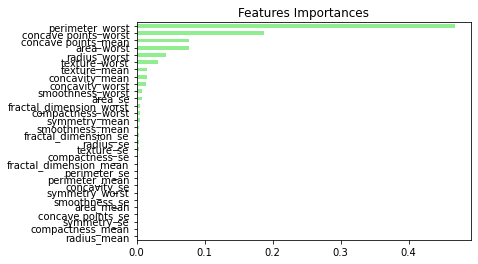

In [101]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Boosting

- Boosting: Ensemble method combining several weak learners to form a strong learner.
- Weak learner: model doing slightly better than random guessing - eg. CART 

In [102]:
#AdaBoost classifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.99


In [103]:
#GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_pred, y_test)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.198


In [104]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error

# Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 0.201


# tree's hyperparameter grid

In [105]:
# Define params_dt
params_dt = {
            'max_depth' : [2,3,4], 
            'min_samples_leaf' : [0.12,0.14,0.16,0.18]
            }

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.921


In [106]:
params_rf = {
            'n_estimators' : [100, 350, 500], 
            'max_features' : ['log2', 'auto', 'sqrt'],
            'min_samples_leaf' : [2, 10, 30]
            }

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   22.7s finished


Test RMSE of best model: 0.208
